In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [66]:
datasets = pd.read_csv('Student_Performance.csv')

In [67]:
datasets.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [68]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [69]:
datasets.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,5052,NaN,NaN,NaN
mean,4.992900,69.445700,NaN,6.530600,4.583300,55.224800
std,2.589309,17.343152,NaN,1.695863,2.867348,19.212558
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,71.000000


In [70]:
X=datasets.iloc[:,:-1].values
y=datasets.iloc[:,-1].values

In [71]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [72]:
X.shape

(10000, 6)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)

In [74]:
X_train.shape

(7000, 6)

In [75]:
X_test.shape

(3000, 6)

In [76]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = multi_regressor.predict(X_test)

In [78]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[-0.29085643  0.29085643  2.85895223  1.01551979  0.47967676  0.19039416]
-33.54568738005484


In [79]:
print("Variance Score: ",multi_regressor.score(X_test,y_test))

Variance Score:  0.9890110607021136


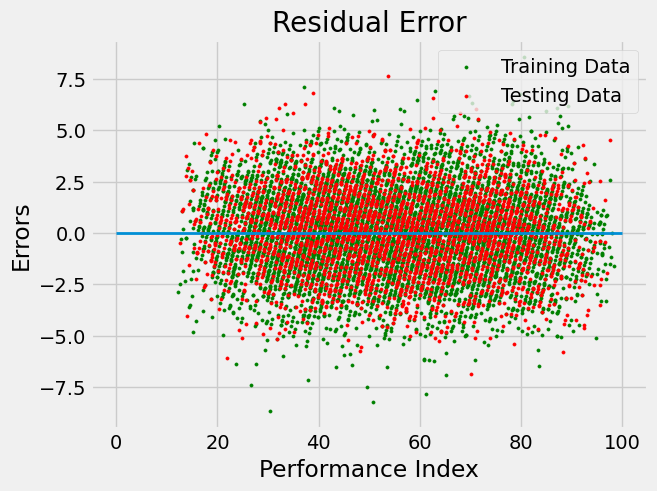

In [80]:
plt.style.use('fivethirtyeight')
plt.scatter(multi_regressor.predict(X_train),multi_regressor.predict(X_train)-y_train,color='green',s=5,label='Training Data')
plt.scatter(multi_regressor.predict(X_test),multi_regressor.predict(X_test)-y_test, color= 'red', s=5, label= 'Testing Data')
plt.hlines(y=0,xmin=0,xmax=100, linewidth=2)
plt.legend(loc='upper right')
plt.xlabel('Performance Index')
plt.ylabel('Errors')
plt.title('Residual Error')
plt.show()

In [81]:
pd.DataFrame(X).corr()

,0,1,2,3,4,5
0,1.000000,-1.000000,-0.003873,-0.008369,0.023284,-0.013103
1,-1.000000,1.000000,0.003873,0.008369,-0.023284,0.013103
2,-0.003873,0.003873,1.000000,-0.012390,0.001245,0.017463
3,-0.008369,0.008369,-0.012390,1.000000,0.005944,0.007888
4,0.023284,-0.023284,0.001245,0.005944,1.000000,0.003990
5,-0.013103,0.013103,0.017463,0.007888,0.003990,1.000000


<Axes: >

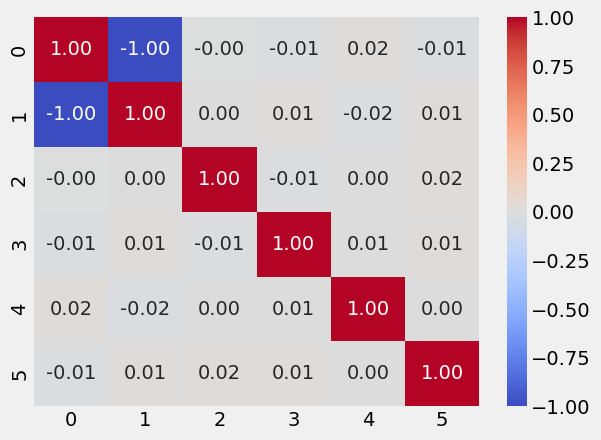

In [82]:
sns.heatmap(pd.DataFrame(X).corr(),annot=True,cmap='coolwarm',fmt='.2f')

In [83]:
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE:  1.6090437564045248
MSE:  4.066563824092694
RMSE:  2.0165722957763488


## **Polynomial Regression**

### Using Degree 3

In [84]:
poly_degree3 =PolynomialFeatures(degree=3)
X_poly3 = poly_degree3.fit_transform(X_train)

In [85]:
X_poly3.shape

(7000, 84)

In [86]:
print(X_poly3)

[[  1.   0.   1. ...  36.   6.   1.]
 [  1.   0.   1. ... 243.  81.  27.]
 [  1.   1.   0. ...  36.   6.   1.]
 ...
 [  1.   1.   0. ... 294. 252. 216.]
 [  1.   1.   0. ...   0.   0.   0.]
 [  1.   1.   0. ... 216. 216. 216.]]


In [87]:
poly_degree3.fit(X_poly3,y_train)

PolynomialFeatures(degree=3)

In [88]:
poly_regressor = LinearRegression()

In [89]:
poly_regressor.fit(X_poly3,y_train)

LinearRegression()

In [90]:
poly_regressor.coef_

array([ 3.26344779e-12,  1.65994841e-01, -1.65994841e-01,  1.52717835e+00,
        6.40625114e-01,  7.58805229e-01, -3.41292892e-02,  1.65994841e-01,
       -2.27393191e-13,  7.58268939e-01,  3.17744964e-01,  2.84819942e-01,
        3.52096778e-03, -1.65994841e-01,  7.68909412e-01,  3.22880151e-01,
        4.73985286e-01, -3.76502570e-02,  1.20169953e-02, -7.33532471e-03,
        1.85489026e-02, -6.90149851e-03, -1.71442146e-03, -1.01220393e-02,
       -2.85232136e-03, -1.03467917e-01,  5.80599156e-02,  2.31196772e-02,
        1.65994841e-01, -5.89112092e-15,  7.58268939e-01,  3.17744964e-01,
        2.84819942e-01,  3.52096778e-03,  9.40914013e-15, -1.88737914e-15,
        4.67681449e-15,  2.02615702e-15, -3.74700271e-16, -2.83733357e-04,
       -3.53614838e-03,  1.70223747e-02, -3.59218327e-03, -8.49429418e-04,
       -4.33133464e-03, -1.63476887e-03, -4.43950121e-02,  2.94181779e-02,
        8.85758259e-03, -1.65994841e-01,  7.68909412e-01,  3.22880151e-01,
        4.73985286e-01, -

In [91]:
poly_regressor.intercept_

-41.21908557380336

In [92]:
poly_pred = poly_regressor.predict(poly_degree3.fit_transform(X_test))

In [93]:
print('Variance Score: ',poly_regressor.score(poly_degree3.fit_transform(X_test),y_test))

Variance Score:  0.9889891548985847


In [94]:
print("MAE: ",metrics.mean_absolute_error(y_test,poly_pred))
print('MSE: ',metrics.mean_squared_error(y_test,poly_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,poly_pred)))

MAE:  1.6080075492917307
MSE:  4.074670279661639
RMSE:  2.0185812541638346


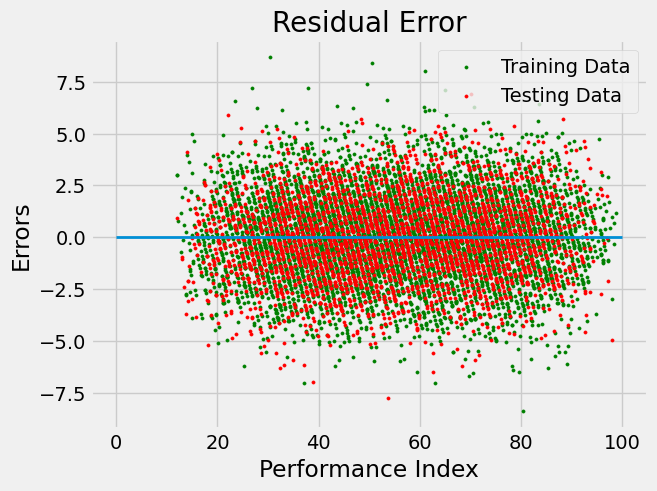

In [97]:
plt.style.use('fivethirtyeight')

X_poly_train = poly_degree3.transform(X_train)
y_pred_train = poly_regressor.predict(X_poly_train)
residuals_train = y_train - y_pred_train
X_poly_test = poly_degree3.transform(X_test)
y_pred_test = poly_regressor.predict(X_poly_test)
residuals_test = y_test - y_pred_test

plt.scatter(y_pred_train, residuals_train, color='green', s=5, label='Training Data')
plt.scatter(y_pred_test, residuals_test, color='red', s=5, label='Testing Data')
plt.hlines(y=0, xmin=0, xmax=100, linewidth=2)
plt.legend(loc='upper right')
plt.xlabel('Performance Index')
plt.ylabel('Errors')
plt.title('Residual Error')
plt.show()


### Using Degree 2

In [99]:
poly_degree2 =PolynomialFeatures(degree=2)
X_poly2 = poly_degree2.fit_transform(X_train)

In [100]:
X_poly2.shape

(7000, 28)

In [101]:
print(X_poly2)

[[ 1.  0.  1. ... 36.  6.  1.]
 [ 1.  0.  1. ... 81. 27.  9.]
 [ 1.  1.  0. ... 36.  6.  1.]
 ...
 [ 1.  1.  0. ... 49. 42. 36.]
 [ 1.  1.  0. ... 81.  0.  0.]
 [ 1.  1.  0. ... 36. 36. 36.]]


In [102]:
poly_degree2.fit(X_poly2,y_train)

PolynomialFeatures()

In [103]:
poly_regressor = LinearRegression()

In [104]:
poly_regressor.fit(X_poly2,y_train)

LinearRegression()

In [105]:
poly_regressor.coef_

array([ 1.01518708e-14, -1.29937601e-01,  1.29937601e-01,  1.86664824e+00,
        6.84473250e-01,  7.53073663e-02,  9.46985527e-02, -1.29937601e-01,
        2.60902411e-15,  9.19993190e-01,  3.42799619e-01,  3.47779687e-02,
        5.03555647e-02,  1.29937601e-01,  9.46655053e-01,  3.41673630e-01,
        4.05293976e-02,  4.43429880e-02,  4.18328621e-03,  6.62878139e-05,
        1.19474369e-03,  1.14804588e-03, -8.90207552e-05,  2.58224413e-04,
       -1.80937293e-04,  2.32036255e-02,  8.80161978e-03, -2.64705290e-04])

In [106]:
poly_regressor.intercept_

-32.54811614542836

In [107]:
poly_pred = poly_regressor.predict(poly_degree2.fit_transform(X_test))

In [108]:
print('Variance Score: ',poly_regressor.score(poly_degree2.fit_transform(X_test),y_test))

Variance Score:  0.9889877108835811


In [109]:
print("MAE: ",metrics.mean_absolute_error(y_test,poly_pred))
print('MSE: ',metrics.mean_squared_error(y_test,poly_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,poly_pred)))

MAE:  1.6097498350387187
MSE:  4.075204651452776
RMSE:  2.018713613034988


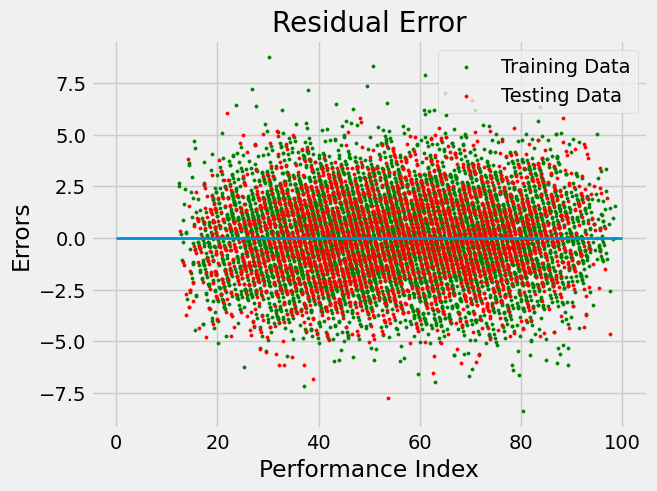

In [110]:
plt.style.use('fivethirtyeight')

X_poly_train = poly_degree2.transform(X_train)
y_pred_train = poly_regressor.predict(X_poly_train)
residuals_train = y_train - y_pred_train
X_poly_test = poly_degree2.transform(X_test)
y_pred_test = poly_regressor.predict(X_poly_test)
residuals_test = y_test - y_pred_test

plt.scatter(y_pred_train, residuals_train, color='green', s=5, label='Training Data')
plt.scatter(y_pred_test, residuals_test, color='red', s=5, label='Testing Data')
plt.hlines(y=0, xmin=0, xmax=100, linewidth=2)
plt.legend(loc='upper right')
plt.xlabel('Performance Index')
plt.ylabel('Errors')
plt.title('Residual Error')
plt.show()
